# Data Loaders

In [ ]:
!curl -L -o data/rice-image-dataset.zip https://www.kaggle.com/api/v1/datasets/download/muratkokludataset/rice-image-dataset

In [3]:
!unzip -q data/rice-image-dataset.zip -d data/

In [11]:
import splitfolders

input_dir = 'data/Rice_Image_Dataset'
dataset_path = 'data/rice-dataset-sample-splits'

# Utiliza la función splitfolders para dividir el conjunto de rice-dataset-sample en
# un conjunto de train, otro de validación y otro de test. Guarda el resultado de los splits
# en el directorio rice-dataset-sample-splits

splitfolders.ratio(
    input_dir,
    output=dataset_path,
    seed=42,
    ratio=(.7, .2, .1)
)

## ImageFolders

In [12]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

In [13]:
from torchvision import datasets

# Crear un ImageFolder para cada conjunto (train, val y test)

train_dataset = datasets.ImageFolder(root=f"{dataset_path}/train", transform=transform)
val_dataset = datasets.ImageFolder(root=f"{dataset_path}/val", transform=transform)
test_dataset = datasets.ImageFolder(root=f"{dataset_path}/test", transform=transform)

In [14]:
# Consultando los parámetros de un ImageFolder, imprime la dirección que
# contiene las imágenes de train

print(f"Directorio donde están las imágenes: {train_dataset.root}")

Directorio donde están las imágenes: data/rice-dataset-sample-splits/train


In [15]:
# Consultando los parámetros de un ImageFolder, imprime las clases
# contenidas en el ImageFolder de train

print(f"Clases del dataset: {train_dataset.classes}")

Clases del dataset: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [16]:
# Consultando los parámetros de un ImageFolder, imprime la equivalencia
# entre clases e índices en train.
# TIP: El resultado debe ser algo como: {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

print(f"Asignaciones de clase e ID: {train_dataset.class_to_idx}")

Asignaciones de clase e ID: {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}


In [17]:
# Imprime los targets contenidos en el ImageFolder de train

print(f"Targets de las imágenes cargas:{train_dataset.targets}")

Targets de las imágenes cargas:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## DataLoaders

In [18]:
from torch.utils.data import DataLoader

batch_size = 16
shuffle = True

# Crear un DataLoader para cada ImageFolder (train, val, test)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=shuffle)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle)

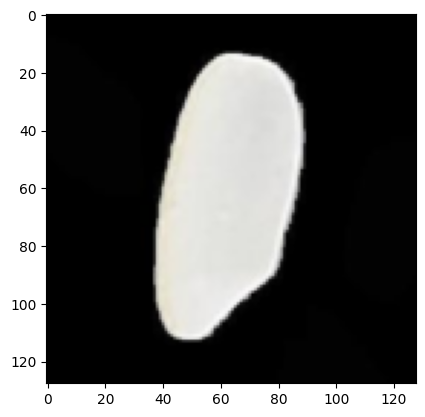

In [19]:
import matplotlib.pyplot as plt

img, label = next(iter(train_dataloader))
plt.imshow(img[0].permute(1,2,0))

## Custom Dataset

In [24]:
import pandas as pd

data = {
    'image_path': [
        f'{input_dir}/Arborio/Arborio (1).jpg',
        f'{input_dir}/Arborio/Arborio (2).jpg',
        f'{input_dir}/Basmati/Basmati (1).jpg',
        f'{input_dir}/Basmati/Basmati (2).jpg',
        f'{input_dir}/Ipsala/Ipsala (1).jpg',
        f'{input_dir}/Ipsala/Ipsala (2).jpg'
    ],
    'target': [
        'Arborio',
        'Arborio',
        'Basmati',
        'Basmati',
        'Ipsala',
        'Ipsala'
    ]
}

dataset = pd.DataFrame(data)
dataset

,image_path,target
0,data/Rice_Image_Dataset/Arborio/Arborio (1).jpg,Arborio
1,data/Rice_Image_Dataset/Arborio/Arborio (2).jpg,Arborio
2,data/Rice_Image_Dataset/Basmati/Basmati (1).jpg,Basmati
3,data/Rice_Image_Dataset/Basmati/Basmati (2).jpg,Basmati
4,data/Rice_Image_Dataset/Ipsala/Ipsala (1).jpg,Ipsala
5,data/Rice_Image_Dataset/Ipsala/Ipsala (2).jpg,Ipsala


In [25]:
from torchvision.io import read_image
from torch.utils.data import Dataset

class RiceCustomDataset(Dataset):
  def __init__ (self, dataset):
    # Asigna el valor de dataset a una variable de clase llamada dataset
    self.dataset = dataset

  def __len__(self):
    # Devuelve la longitud del dataset
    return self.dataset.shape[1]

  def __getitem__(self, index):
    # Obten la ruta de la imagen de la posición index
    image_path = self.dataset["image_path"][index]
    image = read_image(image_path)
    # Obtener la etiqueta de la imagen en la posición index
    label = self.dataset["target"][index]

    return image, label

In [26]:
# Instancia el RiceCostumDataset con el dataset anteriormente creado

rice_dataset = RiceCustomDataset(dataset)

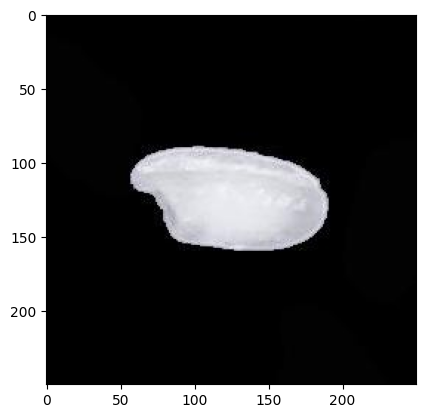

In [27]:
plt.imshow(rice_dataset[0][0].permute(1,2,0))